In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
with open('슈퍼말차클린.json') as json_file:
    json_data = json.load(json_file)

In [5]:
df = pd.DataFrame(json_data['data'])

In [6]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[.\n#떠먹는고구마피자 #떠고피 🍕🍠💛\n#라미의잘빠진다이어트레시피\n.\n고구마...,"[떠먹는고구마피자, 떠고피, 라미의잘빠진다이어트레시피, 슈퍼말차클린, 오르빗소시지,...",[],2020년 9월 12일,[796]
1,1,[New💚 Super matcha clean🌿\n100% 식물 유래의 자연 성분으로...,"[온도룸, 신상카페, 수원카페, 동탄카페, 화성카페, 오산카페, 용인카페, 동탄2카...",[동탄2신도시],2020년 9월 10일,[48]
2,2,[🟩 슈퍼말차클린 신제품 나눔이벤트 🟩\n⠀\...,[챱챱언니],[],2020년 7월 10일,[]
3,3,"[슈퍼말차 클린 리뷰\n.\n키토에 적합한 탄산음료라 함은\n트○○, 씨○○ 등 플...","[미트러버, 마테차, 슈퍼말차, 슈퍼말차클린, 키토탄산음료, 와디즈, 와디즈펀딩, ...",[],2020년 7월 6일,[69]
4,4,[슈퍼말차클린으로 초록초록💚💚🌿🌿 홈카페☺🤭\nNO설탕 당류0% 라니..👍\n말차인...,"[슈퍼말차, 슈퍼말차클린, 탄산말차, 말차탄산, 말차덕후, 맑은홈카페, 일상, da...",[],2020년 7월 29일,[314]
...,...,...,...,...,...,...
136,136,[슈퍼말차 클린은\n기존 고칼로리 탄산으...,"[클린에너지, 와디즈, 슈퍼말차클린, 알림...",[],2020년 6월 30일,[75]
137,137,"[Vegan Sparkling Drink,\nClean Energy⚡️\nVeget...","[슈퍼말차, 와디즈, 알림신청, 말차스파클...",[],2020년 6월 22일,[]
138,138,"[설탕을 벗어던진 당류 0%,\n슈퍼드링크⚡...","[와디즈, 슈퍼말차클린, 말차스파클링, 에ᄂ...",[],2020년 6월 11일,[]
139,139,[🔜\n100% Plant-based\nClean Energy\nSparkling\...,"[슈퍼말차클린, supermatchaclean, 슈퍼말차, 말차캔, 커밍순]",[],2020년 6월 3일,[]


# Hashtags 분석

# 1. Word Cloud

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [8]:
tags = [element for array in list(df.Hashtags) for element in array]

In [9]:
tags[0:5]

['떠먹는고구마피자', '떠고피', '라미의잘빠진다이어트레시피', '슈퍼말차클린', '오르빗소시지']

In [23]:
ion_stop_words = ['error','포카리스웨트', '게토레이', '비타민워터', '파워에이드', 'pocarisweat',\
                 'gatorade', '포카리스웨트','슈퍼말차','supermatcha','슈퍼말차클린',
                 '슈퍼말차클린','슈퍼말차']

In [24]:
cv = CountVectorizer(max_features=10000, stop_words = ion_stop_words)

In [25]:
tdm = cv.fit_transform(tags)

In [26]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [27]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
540,비건,14
640,에너지드링크,12
316,클린에너지,11
707,일상,11
664,와디즈펀딩,11
398,다이어트,11
784,클린에너지,10
210,무설탕,10
467,말차,9
559,사전체험단,9


In [28]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [29]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

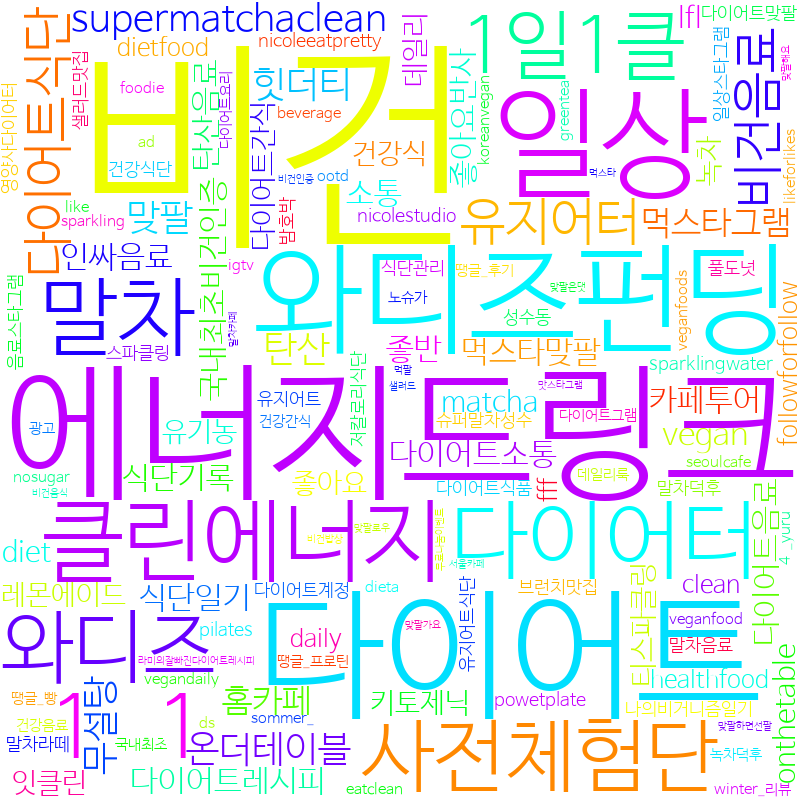

In [30]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [124]:
tdm.shape

(776597, 10000)

In [125]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [126]:
words = cv.get_feature_names()

In [127]:
tokens = tags

In [128]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 7min 58s


In [129]:
from sklearn.decomposition import TruncatedSVD

In [130]:
svd = TruncatedSVD(n_components=1000)

In [131]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [132]:
svd.components_.shape

(1000, 10000)

In [133]:
word_emb = svd.components_.T

In [134]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7715
건강한비타민c 1981
소통 5940
데일리 4027
다이어트 3769
맞팔 4608
좋아요 8118
daily 513
비타500_모델_펭수 5527
운동 7223
운동하는여자 7270
데이바이핏 4018
dayxfit 536
운동하는남자 7265
에너지음료 6815
선팔 5841
일상 2425
오늘도몬스터 7041
헬스 9718
좋아요반사 8122
펭수 2538
운동스타그램 7240
일상스타그램 7728
광동제약 2011
펭수 9183
피로회복 9412
레드불 2095
좋반 8112
건강음료 1978
비타챙겨 2212
먹스타그램 4684
건강뿜뿜 1977
마시는비타민c 2111
신이나 2298
펭수비타500 2540
힘내세요 2615
내몸에비타 2033
건강챙겨얍 1979
펭타 2545
비타500주세요 2200
까꿍 2023
할수이따 2576
헬스타그램 9730
ootd 1296
energydrink 621
팔로우 9102
repost 1489
선팔하면맞팔 5848
f4f 642
광동제약 3224
selfie 1537
monster 1191
셀카 5911
다이어터 3765
카페인 8647
이벤트 7550
직장인 8271
레드불400 4326
셀스타그램 5910
에이트타임 6846
셀피 5918
비타오백 5556
아르기닌 6441
첫줄 8412
인친 7670
주말 8142
에너지드링크 2329
에너지충전 6819
러닝 4287
비타펭수 5563
vita500 1848
펭클럽 9216
감사합니다 2784
맛스타그램 4571
서울 5777
화이팅 9851
follow 689
웨이크보드 7371
다이어트식단 3789
피로회복제 9417
부산 5331
에이트타임인핸서 6853
나를위한비타민c 3513
커피 8732
몬스터에너지 2142
헬린이 9709

In [135]:
word_emb = svd.components_.T

In [136]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [137]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 2min 30s


220

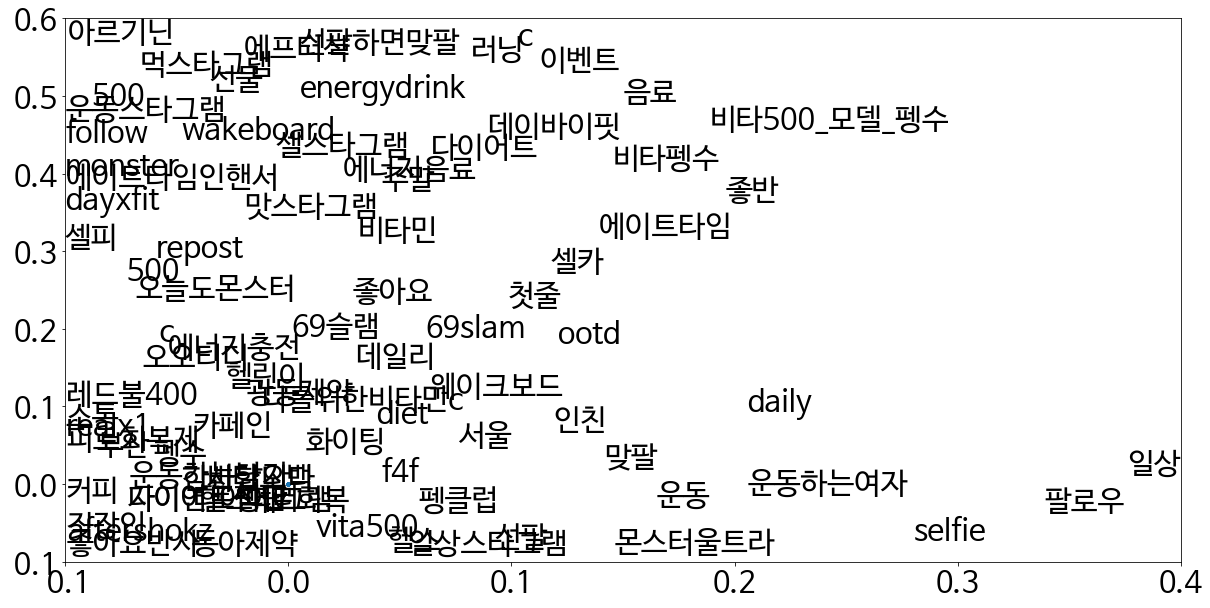

In [138]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.4)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [139]:
from sklearn.manifold import TSNE

In [140]:
tsne = TSNE()

In [141]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 6min 55s


84

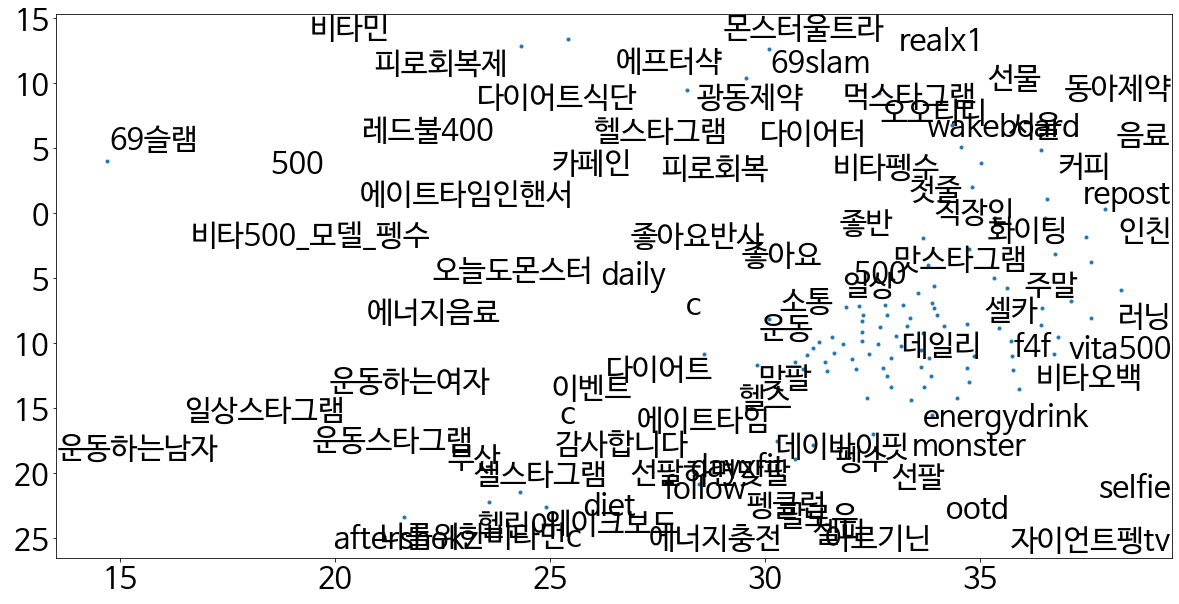

In [142]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [143]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [144]:
sentences = list(df['Hashtags'])

In [145]:
model = Word2Vec(sentences, size = 1000, min_count = 500, workers = 4, window = 100) # negative, sg

In [146]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [147]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [148]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

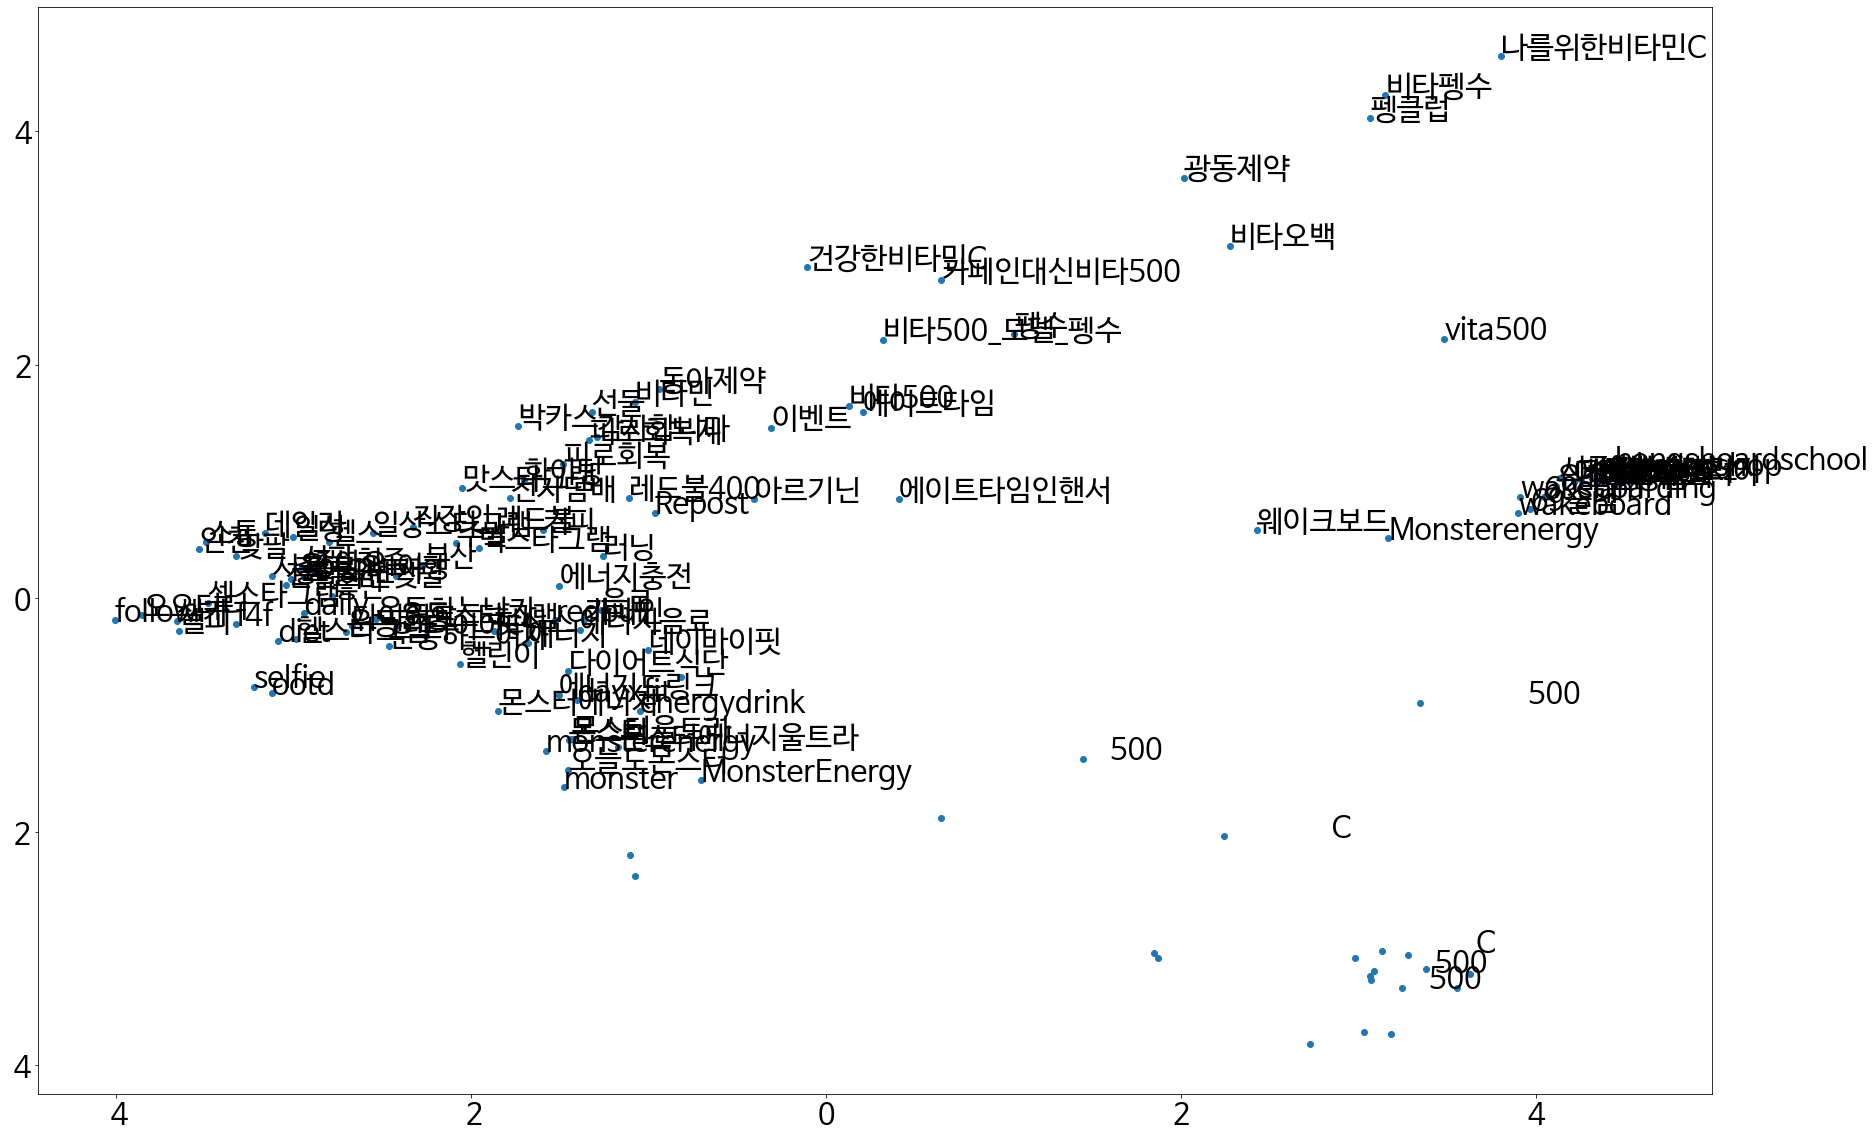

In [149]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [42]:
locates = [element for array in list(df.Locates) for element in array]

In [43]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [44]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
1569,seoul,1101
296,busan,239
955,jeju,198
4688,어딘가,197
530,do,191


In [45]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [46]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

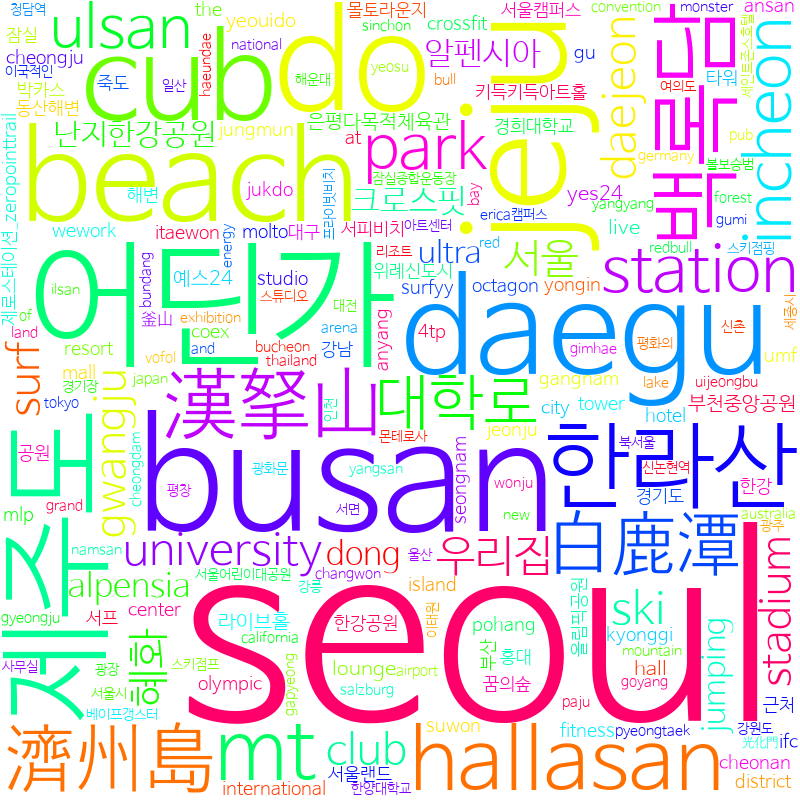

In [47]:
cloud.to_image()

## - Embedding

- LSA

In [48]:
tdm.shape

(12970, 6522)

In [49]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [50]:
words = cv.get_feature_names()
tokens = locates

In [51]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 2.17 s


In [52]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 9.89 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [53]:
svd.components_.shape

(1000, 6522)

In [54]:
word_emb = svd.components_.T

In [55]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 1569
busan 296
jeju 955
어딘가 4688
do 530
daegu 489
beach 205
제주도 5460
cub 473
한라산 6287
백록담 3550
hallasan 787
mt 1237
濟州島 2055
漢拏山 2053
白鹿潭 2058
station 1672
incheon 909
park 1372
대학로 2878
ulsan 1805
university 1819
우리집 5004
ski 1610
혜화 6392
daejeon 491
gwangju 762
surf 1698
서울 4005
club 422
stadium 1661
크로스핏 5908
alpensia 103
dong 535
알펜시아 4595
jumping 984
난지한강공원 2609
은평다목적체육관 5149
ultra 1806
라이브홀 3107
hall 785
예스24 4874
부천중앙공원 3730
live 1099
yes24 1939
lounge 1108
yeouido 1938
mall 1137
해변 6334
釜山 2067
resort 1479
박카스 3501
at 163
부산 3697
wework 1888
jukdo 982
molto 1215
몰토라운지 3379
죽도 5526
강남 2118
서프 4078
cheonan 372
octagon 1332
서피비치 4083
tower 1774
crossfit 469
coex 428
itaewon 933
위례신도시 5102
olympic 1340
경희대학교 2246
ifc 896
제로스테이션_zeropointtrail 5447
hotel 865
서울랜드 4021
공원 2313
꿈의숲 2572
international 924
jungmun 986
umf 1807
키득키득아트홀 5933
cheongju 376
fitness 634
suwon 1711
studio 1682
잠실 5333
ansan 126
경기도 2198
gu 739
서울캠퍼스 4057
근처 2494
홍대 6413
center 349
gangnam 670
올림픽공원 4945


In [56]:
word_emb = svd.components_.T

In [57]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 26s


127

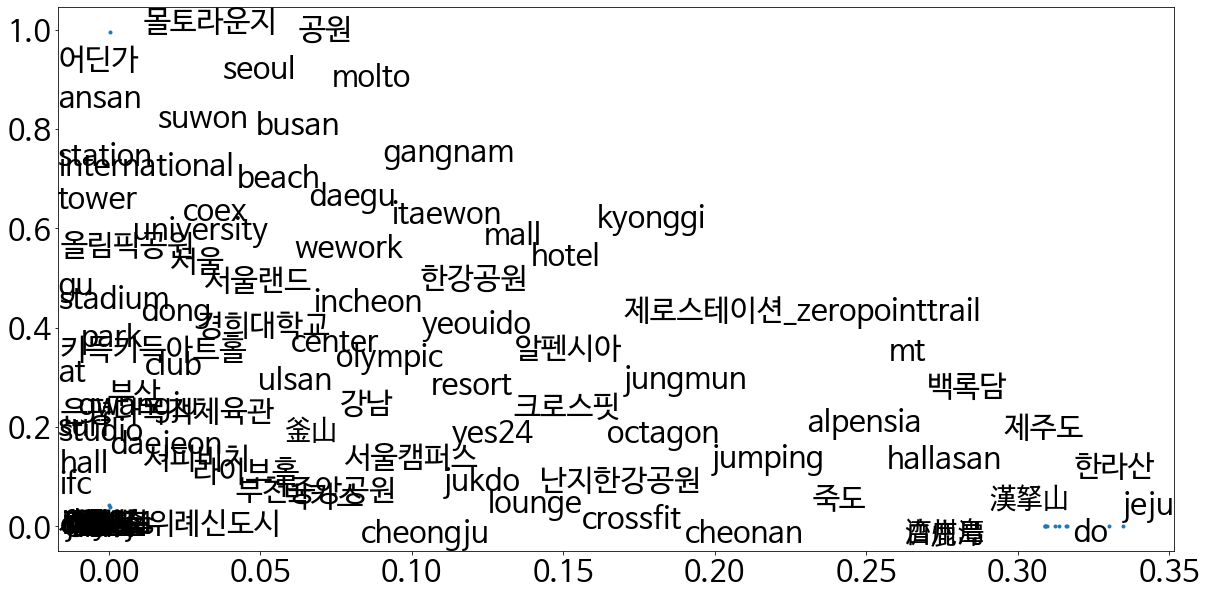

In [58]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [59]:
tsne = TSNE()

In [60]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 4min 16s


90

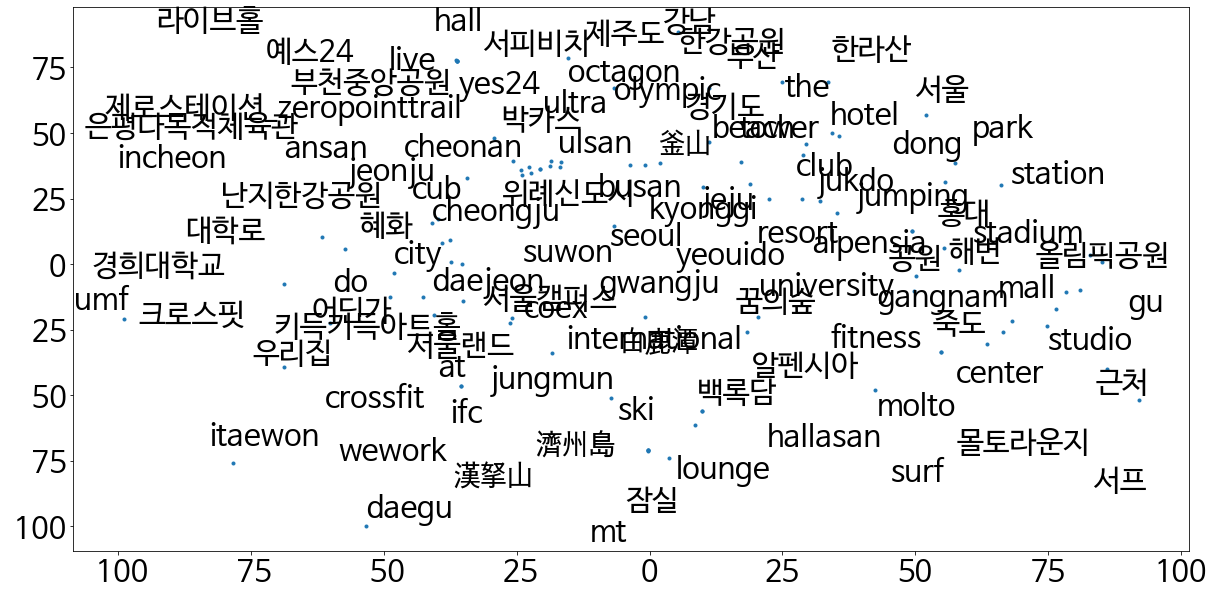

In [61]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [62]:
sentences = list(df['Locates'])

In [63]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [64]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [65]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 6.95 ms


In [66]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

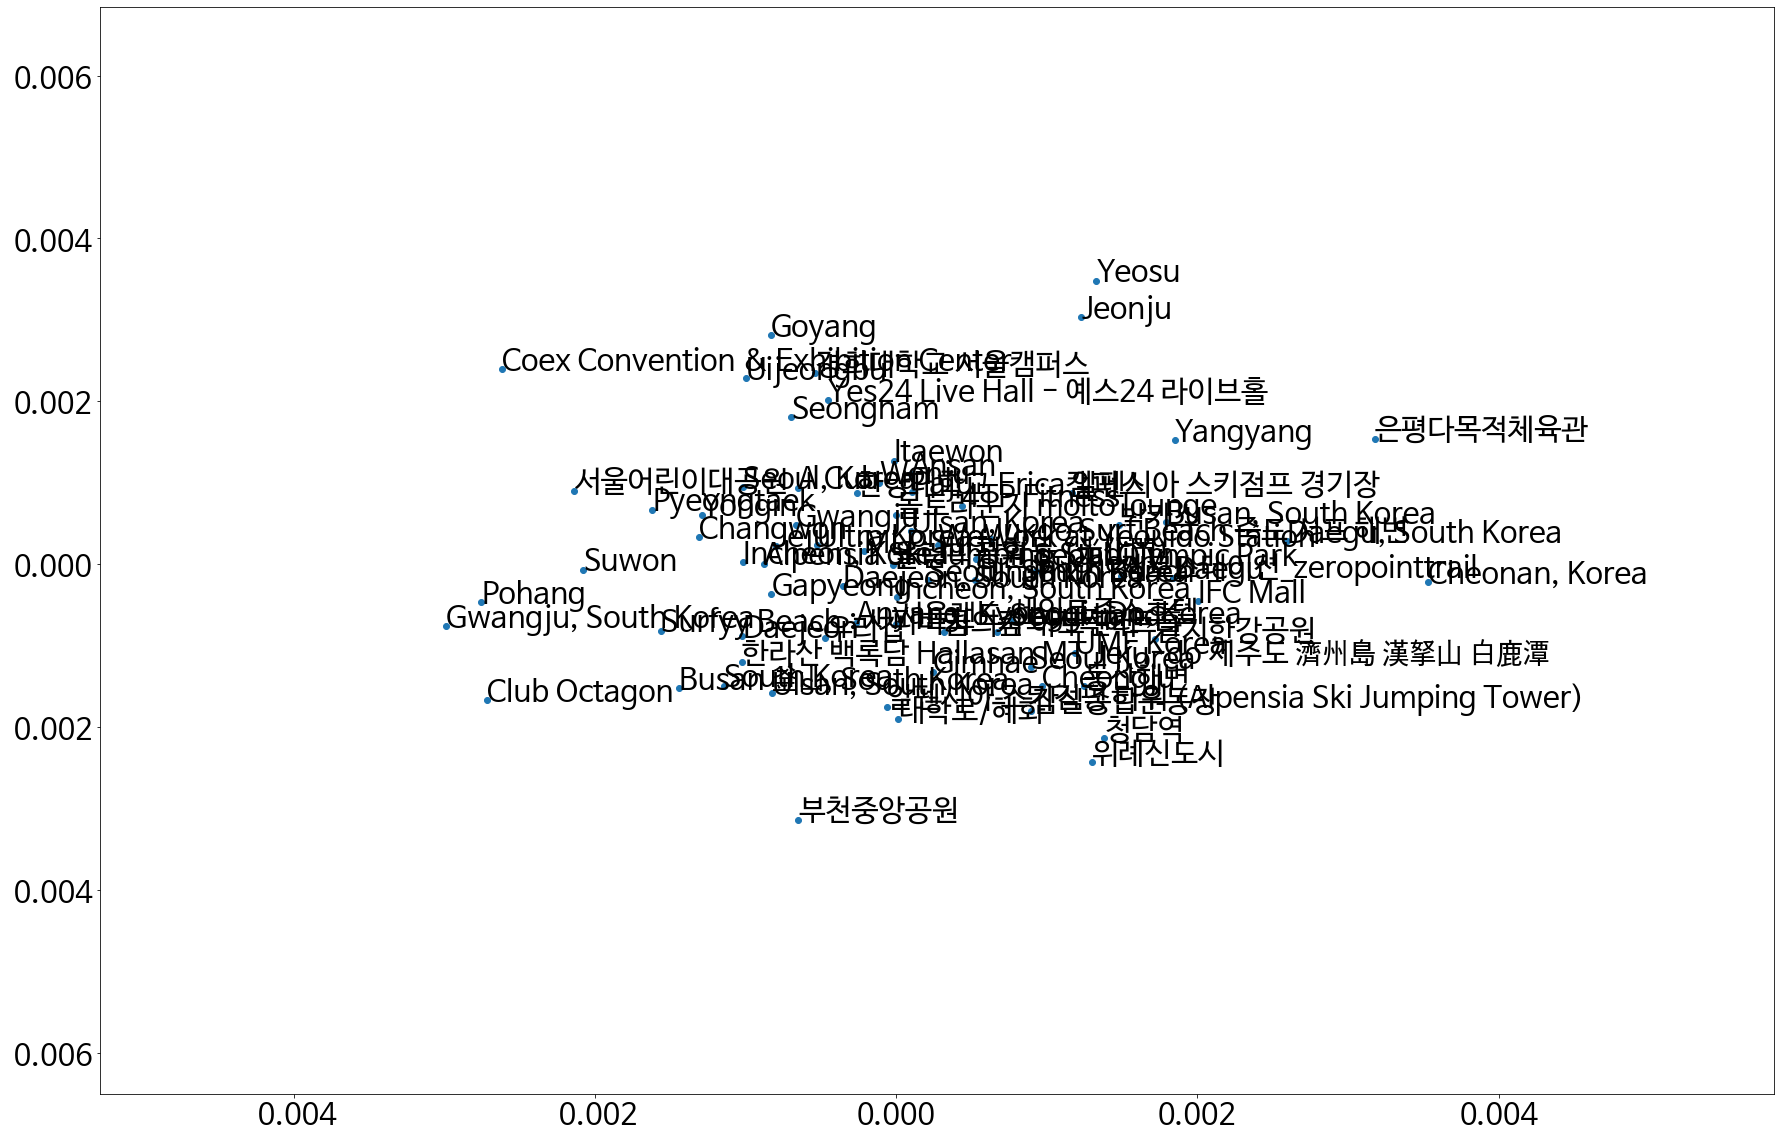

In [67]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))